In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_np = data[(data['Ptl_note']=='No ptl')]

In [4]:
data_np.drop(114, axis=0, inplace=True)
data_np.drop(116, axis=0, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [5]:
data_np

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
115,2017072403,34,2,1,1,0,1,"4,3","4,3",15,0,No Run down for 40 minutes,No ptl
117,2017072503,35,2,1,1,0,1,"10,11,12,13","10,11,12,13",15,0,Run down initial 20 minutes,No ptl
118,2017072503,35,2,1,1,0,1,"3,4","3,4",15,0,No rundown for 30 minutes,No ptl
119,2017072802,22,1,1,0,0,1,6,6,15,0,No rundown for 40 minutes,No ptl
120,2017081801,30,2,0,0,0,1,"7,8","7,8",15,0,No rundown for 60 minutes,No ptl


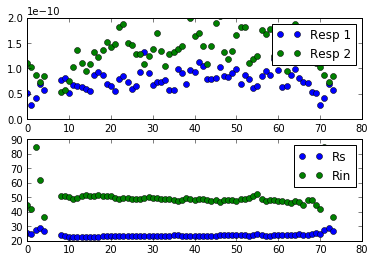

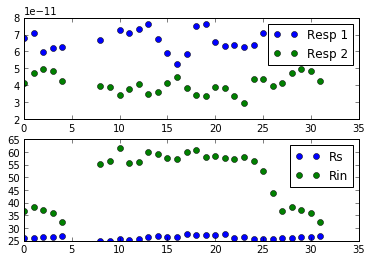

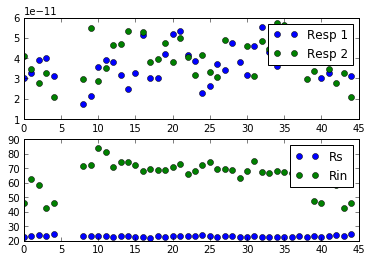

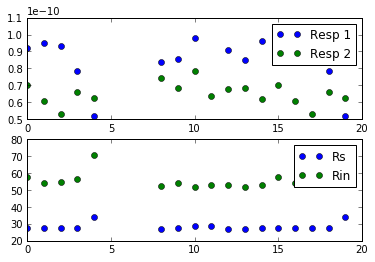

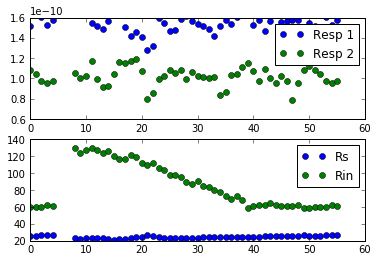

In [6]:
patch_pip.df_ana(data_np,'/data/data_no_protocol')
data_no_ptl = pd.read_pickle('/data/data_no_protocol')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(data_no_ptl)

In [7]:
ave_ptl_base = np.mean(ave_ptl_mean[:5])
ave_ptl_mean = ave_ptl_mean/ave_ptl_base
ave_ptl_ste = ave_ptl_ste/ave_ptl_base

plt_ave_ptl_mean = np.concatenate([ave_ptl_mean[:5],ave_ptl_mean[12:]])
plt_ave_ptl_ste = np.concatenate([ave_ptl_ste[:5],ave_ptl_ste[12:]])

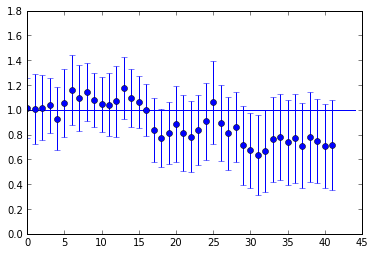

In [8]:
plt.errorbar(x=np.arange(len(plt_ave_ptl_mean[:42])), y=plt_ave_ptl_mean[:42], yerr=plt_ave_ptl_ste[:42], fmt='bo')
plt.plot(np.arange(45), np.ones(45))
plt.ylim([0,1.8])

with PdfPages('/data/Supp1_1.pdf') as pdf:
    pdf.savefig()

In [11]:
elimi = np.array([25, 30, 18, 19, 50])
elimi_sr = pd.Series(elimi, index=data_no_ptl.index)
data_no_ptl['elimi']=elimi_sr

In [12]:
data_no_ptl.to_pickle('/data/ana_no_ptl')